## Data@ANZ - Predictive Model Building

Using the same transaction dataset, identify the annual salary for each customer.

Explore correlations between annual salary and various customer attributes. Visualise any interesting correlations using various plots.

Build a regression model to predict the annual salary for each customer using the attributes you identified above.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Df = pd.read_excel(r'C:\Users\oman\Desktop\PHPPRO\ANZ synthesised transaction dataset.xlsx')
Df.tail()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,...,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


### Data Cleaning (Optional)

<b>Lets drop `bpay_biller_code` and  `merchant_code` that had most null values</b>        

In [3]:
Df1 =Df.drop(['bpay_biller_code','merchant_code'], axis=1)

In [4]:
Df1.fillna(method='ffill', inplace=True)

In [5]:
Df1.isnull().sum() * 100 / len(Df1)

status               0.0
card_present_flag    0.0
account              0.0
currency             0.0
long_lat             0.0
txn_description      0.0
merchant_id          0.0
first_name           0.0
balance              0.0
date                 0.0
gender               0.0
age                  0.0
merchant_suburb      0.0
merchant_state       0.0
extraction           0.0
amount               0.0
transaction_id       0.0
country              0.0
customer_id          0.0
merchant_long_lat    0.0
movement             0.0
dtype: float64

<b>We have successfully dropped those two columns and filled remaining using forward fill</b>

In [6]:
Df1.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'balance', 'date',
       'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'movement'],
      dtype='object')

In [7]:
Df2 = Df1[['customer_id','age','balance','amount','txn_description']]
Df2.head()

,customer_id,age,balance,amount,txn_description
0,CUS-2487424745,26,35.39,16.25,POS
1,CUS-2487424745,26,21.20,14.19,SALES-POS
2,CUS-2142601169,38,5.71,6.42,POS
3,CUS-1614226872,40,2117.22,40.90,SALES-POS
4,CUS-2487424745,26,17.95,3.25,SALES-POS


<b>We Created a separate Dataframe with only required features</b>

In [8]:
Df2['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

## Feature Generation
<ul>
    <li>Firstly the data has to indexed on <b>customer_id</b></li> 
    <li>We have to extract all the amount values equal to <b>PAY/SALARY</b>, also</li> 
    <li><b>SALES-POS</b> (Point of Sale) values which determines the spending habit of a customer</li>   
</ul>

In [9]:
Df3= Df2.groupby(["customer_id"]).mean().reset_index()
Df3.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53,2275.852055,222.862603
1,CUS-1117979751,21,9829.929000,339.843700
2,CUS-1140341822,28,5699.212250,212.632500
3,CUS-1147642491,34,9032.841186,245.600169
4,CUS-1196156254,34,22272.433755,147.145796


<b> Grouped all the features on the basis of unique customer ID</b>

In [10]:
salary=Df2[Df2["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns = {'amount':'salary'})
salary.head()

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


<b>Here we created a new feature salary having mean salary of each customer</b>

In [11]:
pos=Df2[Df2["txn_description"]=="POS"].groupby("customer_id").mean().reset_index()
pos=pos[["customer_id","amount"]]
pos=pos.rename(columns = {'amount':'pos'})
pos.head()

,customer_id,pos
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432


<b>Here we created a new feature pos having mean pos value of each customer</b>

In [12]:
sale_pos=Df2[Df2["txn_description"]=="SALES-POS"].groupby("customer_id").mean().reset_index()
sale_pos=sale_pos[["customer_id","amount"]]
sale_pos=sale_pos.rename(columns = {'amount':'sale_pos'})
sale_pos.head()

,customer_id,sale_pos
0,CUS-1005756958,48.311364
1,CUS-1117979751,129.594231
2,CUS-1140341822,116.656538
3,CUS-1147642491,47.985263
4,CUS-1196156254,29.606292


In [13]:
Df4=pd.merge(Df3, salary, on="customer_id")
Df4.head()

,customer_id,age,balance,amount,salary
0,CUS-1005756958,53,2275.852055,222.862603,970.47
1,CUS-1117979751,21,9829.929000,339.843700,3578.65
2,CUS-1140341822,28,5699.212250,212.632500,1916.51
3,CUS-1147642491,34,9032.841186,245.600169,1711.39
4,CUS-1196156254,34,22272.433755,147.145796,3903.73


In [14]:
Df5=pd.merge(Df4, pos, on="customer_id")
Df5.head()

,customer_id,age,balance,amount,salary,pos
0,CUS-1005756958,53,2275.852055,222.862603,970.47,28.769615
1,CUS-1117979751,21,9829.929000,339.843700,3578.65,23.321923
2,CUS-1140341822,28,5699.212250,212.632500,1916.51,34.781282
3,CUS-1147642491,34,9032.841186,245.600169,1711.39,54.271316
4,CUS-1196156254,34,22272.433755,147.145796,3903.73,31.157432


In [15]:
Df6=pd.merge(Df5, sale_pos, on="customer_id")
Df6.drop('amount',axis=1, inplace=True)
Df6.head()

,customer_id,age,balance,salary,pos,sale_pos
0,CUS-1005756958,53,2275.852055,970.47,28.769615,48.311364
1,CUS-1117979751,21,9829.929000,3578.65,23.321923,129.594231
2,CUS-1140341822,28,5699.212250,1916.51,34.781282,116.656538
3,CUS-1147642491,34,9032.841186,1711.39,54.271316,47.985263
4,CUS-1196156254,34,22272.433755,3903.73,31.157432,29.606292


### Correlation of independent variables with our dependent variable

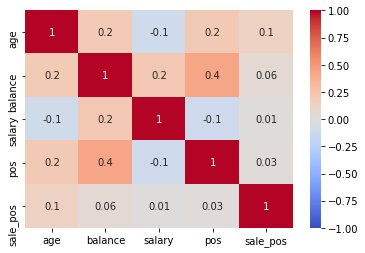

In [16]:
corr = Df6.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1g',vmin=-1, vmax=1, center=0)

### Compare independent variables with dependent variable using regplot

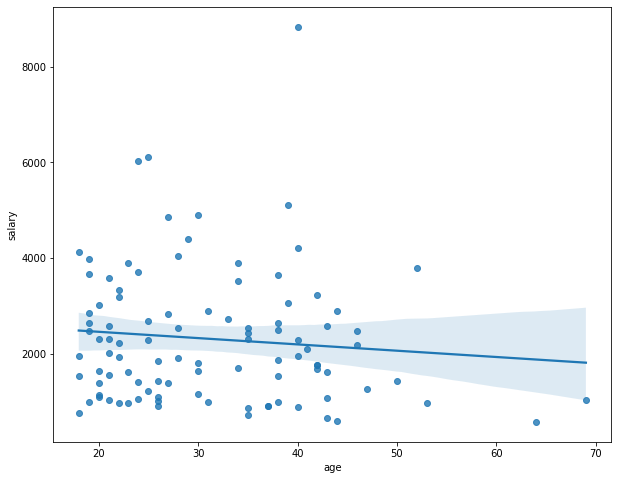

In [17]:
plt.figure(figsize=(10, 8))
sns.regplot("age", "salary", data=Df6)

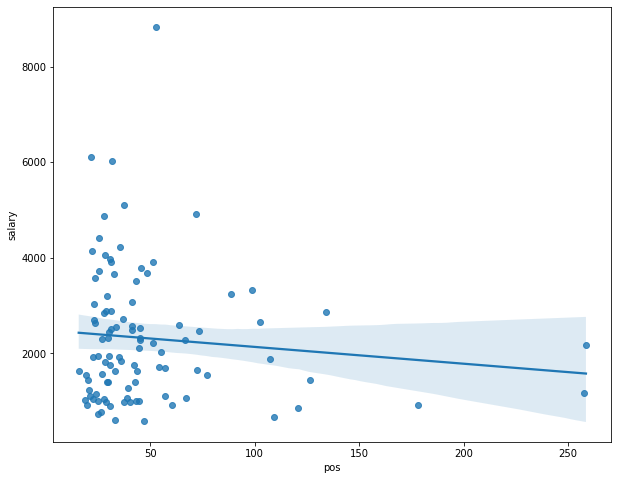

In [18]:
plt.figure(figsize=(10,8))
sns.regplot("pos", "salary", data=Df6)

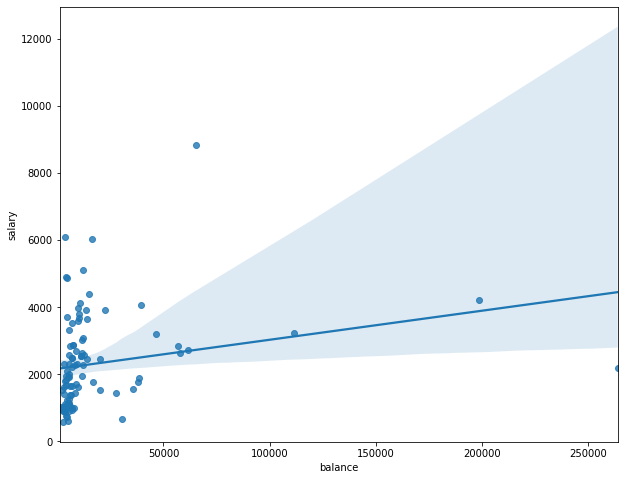

In [19]:
plt.figure(figsize=(10,8))
sns.regplot("balance", "salary", data=Df6)

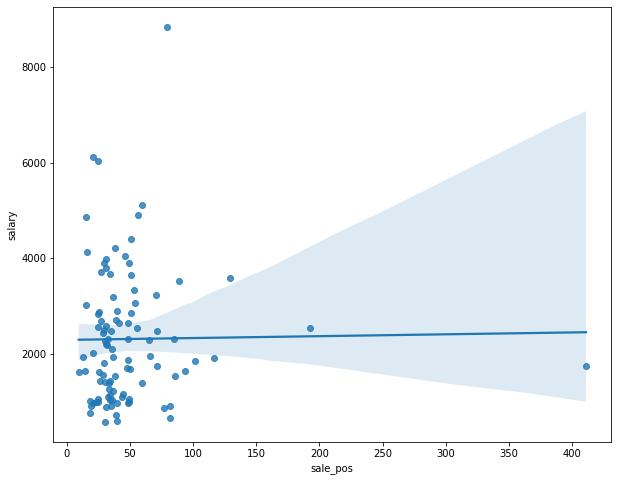

In [20]:
plt.figure(figsize=(10,8))
sns.regplot("sale_pos", "salary", data=Df6)

## Model Building (Supervised learning)

In [21]:
X = Df6[['age','balance','pos','sale_pos']]

Independent Variables

In [22]:
y = Df6['salary']

Dependent Variable

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [24]:
lr = LinearRegression()

In [25]:
cvs = cross_val_score(lr, X, y, cv=20)
cvsm = -cvs
print('Default Accuracy Score:', cvsm.mean())
#Here it will itself fit the data into model

Default Accuracy Score: 0.31896104160812133


In [26]:
error_cvs = cross_val_score(lr, X, y, cv=20, scoring='neg_mean_absolute_error')
error_cvsm = -error_cvs
error_cvsm.mean()

1047.0902524918451